## 🎯 Practice Exercises
## Exercise 1: Build Your First Stateful Agent

### Task
Create an agent with three custom tools:
1. **Weather tool:** Returns simulated weather for a given city
2. **Dictionary tool:** Looks up word definitions (simulate with a small dict)
3. **Web search tool:** Uses DuckDuckGo to search the web for information

### Requirements
1. Define tools using `@tool` decorator
2. Bind tools to LLM
3. Implement conditional routing (agent decides which tool to use)
4. Handle cases where no tool is needed
5. Install DuckDuckGo search: `pip install duckduckgo-search`
6. Use `DDGS().text()` method for web searches

### Example Queries
- "What's the weather in Lagos?" → Uses weather tool
- "Define the word 'ephemeral'" → Uses dictionary
- "Search for latest AI news" → Uses DuckDuckGo web search
- "What's the capital of France?" → No tool needed


**Loading all necessary libraries**

In [2]:
# Imports
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, ToolMessage
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from duckduckgo_search import DDGS
from dotenv import load_dotenv
from IPython.display import Image, display
from typing import Dict, Literal
import os

print("✅ All imports successful")

✅ All imports successful


In [3]:
# Load API key
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

if not openai_api_key:
    raise ValueError("OPENAI_API_KEY not found! Please set it in your .env file.")

print("✅ API key loaded")

✅ API key loaded


In [4]:
# Initialize LLM
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,  # Lower temperature for more precise tool usage
    api_key=openai_api_key
)

print(f"✅ LLM initialized: {llm.model_name}")

✅ LLM initialized: gpt-4o-mini


**Creating the tool**

In [5]:
@tool 
def weather_tool(city: str) -> str:
    """
    Returns simulated weather information for a given city.
    Use this tool when the user asks about weather conditions.
    """
    simulated_weather = {
        "lagos": "It's sunny and humid in Lagos",
        "abuja": "It's warm and slightly cloudy in Abuja",
        "ibadan": "It's hot with a chance of rain in Ibadan",
        "accra": "It's sunny with coastal breeze in Accra",
        "nairobi": "It's cool and pleasant in Nairobi",
        "cairo": "It's hot and dry in Cairo",

        "london": "It's cloudy and cool in London",
        "paris": "It's mild and partly cloudy in Paris",
        "berlin": "It's chilly with light rain in Berlin",
        "madrid": "It's sunny and warm in Madrid",
        "rome": "It's warm with clear skies in Rome",

        "new york": "It's windy in New York",
        "los angeles": "It's sunny and dry in Los Angeles",
        "chicago": "It's cold and windy in Chicago",
        "toronto": "It's cold with snow in Toronto",
        "san francisco": "It's cool and foggy in San Francisco",

        "tokyo": "It's cool and breezy in Tokyo",
        "beijing": "It's hazy and cold in Beijing",
        "seoul": "It's cold with clear skies in Seoul",
        "mumbai": "It's hot and humid in Mumbai",
        "dubai": "It's extremely hot and sunny in Dubai",

        "sydney": "It's warm and sunny in Sydney",
        "melbourne": "It's cool and windy in Melbourne",
    }


    return simulated_weather.get(city.lower(), f"Sorry, I don't have weather information for {city.title()} yet.")

print("Weather tool created")

Weather tool created


In [6]:
@tool
def dictionary_tool(word: str) -> str:
    """
    Looks up the definition of a word.
    Use this tool when the user asks for word meanings or definitions.
    """
    dictionary: Dict[str, str] = {
        # Time & Change
        "ephemeral": "Lasting for a very short time.",
        "temporary": "Not permanent; lasts for a limited period.",
        "fleeting": "Passing very quickly.",
        "transient": "Existing only briefly.",
        "permanent": "Lasting forever or for a very long time.",

        # Frequency & Presence
        "ubiquitous": "Present or found everywhere.",
        "rare": "Not common; seldom found.",
        "prevalent": "Very common or widespread.",
        "sporadic": "Occurring irregularly or occasionally.",

        # Chance & Discovery
        "serendipity": "Finding something good without looking for it.",
        "coincidence": "When events happen at the same time by chance.",
        "fortuitous": "Happening by accident, often in a lucky way.",

        # Knowledge & Understanding
        "cognition": "The process of thinking and understanding.",
        "insight": "A deep understanding of something.",
        "perception": "The way we see or understand things.",
        "intuition": "Knowing something without conscious reasoning.",

        # Technology & AI (relevant to your path 👀)
        "algorithm": "A set of steps used to solve a problem.",
        "model": "A simplified representation of something real.",
        "data": "Facts or information used for analysis.",
        "inference": "Drawing conclusions from data or evidence.",
        "automation": "Using machines or software to perform tasks automatically.",

        # Human Behavior
        "empathy": "The ability to understand and share someone else's feelings.",
        "resilience": "The ability to recover from difficulties.",
        "adaptability": "The ability to adjust to new conditions.",
        "motivation": "The reason or desire to do something.",

        # Communication
        "articulate": "Able to express ideas clearly.",
        "concise": "Short and clear, without unnecessary words.",
        "ambiguous": "Having more than one possible meaning.",
        "explicit": "Stated clearly and in detail.",

        # Abstract & General
        "paradigm": "A typical example or pattern of something.",
        "phenomenon": "An observable event or fact.",
        "constraint": "A limitation or restriction.",
        "hypothesis": "An idea that can be tested.",
    }


    return dictionary.get(word.lower(), f"No definition found for '{word}'.")

print("Dictionary tool created")


Dictionary tool created


In [7]:
@tool
def web_search_tool(query: str) -> str:
    """
    Searches the web using DuckDuckGo.
    Use this tool for recent events, news, or information not in general knowledge.
    """
    # results = []

    # with DDGS() as ddgs:
    #     for r in ddgs.text(query, max_results=3):
    #         results.append(r["body"])

    # return "\n".join(results)

    ddgs = DDGS()
    results = ddgs.text(query, max_results=4)

    if not results:
        return f"No results found for {query}"
    
    # Set the format for the response
    search_output = f"Search Results for '{query}':\n\n"

    for result in results:
        search_output += result['title']
        search_output += result['body']
        search_output += result['href']

    return search_output

print("Web Search tool created")


Web Search tool created


In [8]:
tools = [weather_tool, dictionary_tool, web_search_tool]

llm_with_tools = llm.bind_tools(tools)

print(f"✅ LLM bound to {len(tools)} tools")
print(f"   Tools: {[tool.name for tool in tools]}")

✅ LLM bound to 3 tools
   Tools: ['weather_tool', 'dictionary_tool', 'web_search_tool']


**Test: LLM Decision Making**

In [9]:
# Test: Does LLM decide to call weather_tool?
response = llm_with_tools.invoke([HumanMessage(content="What is the weather in Lagos?")])

print(f"Response type: {type(response)}")
print(f"\nContent: {response.content}")
print(f"\nTool calls: {response.tool_calls}")

Response type: <class 'langchain_core.messages.ai.AIMessage'>

Content: 

Tool calls: [{'name': 'weather_tool', 'args': {'city': 'Lagos'}, 'id': 'call_CPET8CuNxORQX01SX70pZOmb', 'type': 'tool_call'}]


### **Building the Agent Graph**

**Step 1: Define the Assistant Node**

In [10]:
# System prompt that encourages tool usage
sys_msg = SystemMessage(content="""You are a helpful assistant with access to tools.

When asked for weather, use the weather tool.
When asked to give word meanings or definitions,use the dictionary tool.
When asked for recent events, news, or information not in general knowledge, use web search tool.

Only use tools when necessary - for simple questions, if no tool is needed, answer directly.""")

def assistant(state: MessagesState) -> dict:
    """
    Assistant node - decides whether to use tools or answer directly.
    """

    messages = [sys_msg] + state["messages"]
    response = llm_with_tools.invoke(messages)

    return {"messages": [response]}

print("✅ Assistant node defined")


✅ Assistant node defined


**Step 2: Define Conditional Routing**

In [11]:
def should_continue(state: MessagesState) -> Literal["tools", "__end__"]:
    """
    Decide next step based on last message.
    
    If LLM called a tool → go to 'tools' node
    If LLM provided final answer → go to END
    """
    last_message = state["messages"][-1]

    if last_message.tool_calls:
        return "tools"
    return "__end__"

print("✅ Conditional routing function defined")

✅ Conditional routing function defined


**Step 3: Build the Graph**

In [12]:
# Create the graph
graph = StateGraph(MessagesState)

# Add nodes
graph.add_node("assistant", assistant)
graph.add_node("tools", ToolNode(tools))

# Define edges
graph.add_edge(START, "assistant")

graph.add_conditional_edges(
    "assistant",
   should_continue,
    {"tools": "tools", "__end__": END}
)
graph.add_edge("tools", "assistant")

# Add memory
memory = MemorySaver()
agent = graph.compile(checkpointer=memory)

print("✅ Agent graph compiled with tools and memory")


✅ Agent graph compiled with tools and memory


**Step 4: Visualize the Graph**

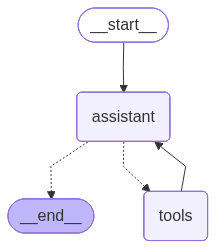

In [13]:
# Visualize the agent graph
try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph: {e}")
    print("Graph structure: START → assistant → [conditional] → tools → assistant → END")

**Testing the tools using agent**

In [14]:
# Helper function
def run_agent(user_input: str, thread_id: str = "test_session"):
    """
    Run the agent and display the conversation.
    """
    print(f"\n{'='*70}")
    print(f"👤 User: {user_input}")
    print(f"{'='*70}\n")
    
    result = agent.invoke(
        {"messages": [HumanMessage(content=user_input)]},
        config={"configurable": {"thread_id": thread_id}}
    )
    
    for message in result["messages"]:
        if isinstance(message, HumanMessage):
            continue  # Already printed
        elif isinstance(message, AIMessage):
            if message.tool_calls:
                print(f"🤖 Agent: [Calling tool: {message.tool_calls[0]['name']}]")
            else:
                print(f"🤖 Agent: {message.content}")
        elif isinstance(message, ToolMessage):
            print(f"🔧 Tool Result: {message.content[:100]}..." if len(message.content) > 100 else f"🔧 Tool Result: {message.content}")
    
    print(f"\n{'='*70}\n")

print("✅ Test function ready")

✅ Test function ready


In [15]:
run_agent("What is the weather in Abuja?")


👤 User: What is the weather in Abuja?

🤖 Agent: [Calling tool: weather_tool]
🔧 Tool Result: It's warm and slightly cloudy in Abuja
🤖 Agent: The weather in Abuja is warm and slightly cloudy.




In [16]:
run_agent("Define the word 'ephemeral'")


👤 User: Define the word 'ephemeral'

🤖 Agent: [Calling tool: weather_tool]
🔧 Tool Result: It's warm and slightly cloudy in Abuja
🤖 Agent: The weather in Abuja is warm and slightly cloudy.
🤖 Agent: [Calling tool: dictionary_tool]
🔧 Tool Result: Lasting for a very short time.
🤖 Agent: The word "ephemeral" means lasting for a very short time.




In [20]:
# I tried to use another thread to test
run_agent("Search for latest AI news", "session2")


👤 User: Search for latest AI news



C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_1900\1196569853.py:15: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  ddgs = DDGS()


🤖 Agent: [Calling tool: web_search_tool]
🔧 Tool Result: Search Results for 'latest AI news':

Artificial intelligence | MIT News | Massachusetts Institute o...
🤖 Agent: Here are some of the latest news highlights in the field of artificial intelligence:

1. **Scientific Sandbox for Vision Systems**: Researchers have developed an AI-powered tool that allows exploration of the evolution of vision systems. This could lead to improvements in the design of sensors and cameras for robots and autonomous vehicles. [Read more](https://news.mit.edu/topic/artificial-intelligence)

2. **Enhancing Large Language Models**: Researchers at the MIT-IBM Watson AI Lab have created a new architecture that enhances the capabilities of large language models, improving state tracking and sequential processing. [Read more](https://news.mit.edu/topic/machine-learning)

3. **Global Economy and AI**: Professor Daron Acemoglu discussed the impact of artificial intelligence on the global economy in an interview, h

In [18]:
run_agent("Search for latest AI news")


👤 User: Search for latest AI news



C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_1900\1196569853.py:15: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  ddgs = DDGS()


🤖 Agent: [Calling tool: weather_tool]
🔧 Tool Result: It's warm and slightly cloudy in Abuja
🤖 Agent: The weather in Abuja is warm and slightly cloudy.
🤖 Agent: [Calling tool: dictionary_tool]
🔧 Tool Result: Lasting for a very short time.
🤖 Agent: The word "ephemeral" means lasting for a very short time.
🤖 Agent: [Calling tool: web_search_tool]
🔧 Tool Result: Search Results for 'latest AI news':

Artificial intelligence | MIT News | Massachusetts Institute o...
🤖 Agent: Here are some of the latest news highlights in artificial intelligence:

1. **Scientific Sandbox for Vision Systems**: Researchers have developed an AI-powered tool that allows exploration of the evolution of vision systems, which could lead to better sensors and cameras for robots and autonomous vehicles. [Read more](https://news.mit.edu/topic/artificial-intelligence)

2. **Enhancing Large Language Models**: MIT-IBM Watson AI Lab researchers have created a new architecture that improves the capabilities of large languag

In [19]:
run_agent("What's the capital of France?")


👤 User: What's the capital of France?

🤖 Agent: [Calling tool: weather_tool]
🔧 Tool Result: It's warm and slightly cloudy in Abuja
🤖 Agent: The weather in Abuja is warm and slightly cloudy.
🤖 Agent: [Calling tool: dictionary_tool]
🔧 Tool Result: Lasting for a very short time.
🤖 Agent: The word "ephemeral" means lasting for a very short time.
🤖 Agent: [Calling tool: web_search_tool]
🔧 Tool Result: Search Results for 'latest AI news':

Artificial intelligence | MIT News | Massachusetts Institute o...
🤖 Agent: Here are some of the latest news highlights in artificial intelligence:

1. **Scientific Sandbox for Vision Systems**: Researchers have developed an AI-powered tool that allows exploration of the evolution of vision systems, which could lead to better sensors and cameras for robots and autonomous vehicles. [Read more](https://news.mit.edu/topic/artificial-intelligence)

2. **Enhancing Large Language Models**: MIT-IBM Watson AI Lab researchers have created a new architecture that im